+++
notebook = true
title = "Saturated Varible-Densitty Flow and Mass Transport(Elder)"
date = "2024-08-09"
author = "Marc Walther, Lion Ahrendt"
project = ["Parabolic/ComponentTransport/elder_jupyter/elder.prj"]
web_subsection = "hydro-component"
+++


<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./elder_jupyter.ipynb" download="elder_jupyter.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=elder_jupyter.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Parabolic/ComponentTransport/elder_jupyter/elder_jupyter.py"><img src="https://img.shields.io/static/v1?label=Source:&message=elder_jupyter.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/Parabolic/ComponentTransport/elder_jupyter/elder_jupyter.py%26branch=6.5.6%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

## Overview

The elder benchmark is based on a experiment in a Hele-Shaw cells conducted by John W. Elder in 1965.
Although unlike the original experiment the flow is caused by a difference in density then a difference in temperature, but by scaling the parameters a similar Rayleigh number can be achieved and therefore similar results observed.
Due to being used to test early modeling software it has become a basic test case for such problem.
Over the years studies about this benchmark where conducted, for example by if and when the results converge with the grid density and numerical stability.

### Problem description

Unfortunately the is at the moment no analytical solution for the Elder benchmark.
The simulation works by assuming a dense fluid in a mixable single phase environment.
On with a hight-concentration fluid is placed on top (in our case on the top right) witch is dissolved and by the power of gravity and diffusion is able to penetrate in to the domain and builds concentration fingers.

### Setup

For the simulation the following variables where chosen:
| variable | value | unit |
|---- |---- | ---- |
| length (L) | 300 | $m$ |
| height (d) | 150 | $m$ |
| extent of intrusion (e) | 150 | $m$ |
| pore diffusion ($D_d$) | $3.57\cdot 10^{-6}$ | $m^2/s$ |
| retardation factor | 1 | - |
| viscosity ($\mu$) | $10^{-3}$ | $kg/m\cdot s$ |
| permeability | 4.8404 $\cdot 10^{-13}$ | $m^2$ |
| longitudinal diversity ($\beta_L$) | 0 | $m$ |
| transversal diversity ($\beta_T$) | 0 | $m$ |
| gravitational acceleration(g) | 9,81 | $m/s^{2}$ |
| expansion coefficient($\alpha$) | 0.2 | - |
| porosity ($\epsilon$) | 0.1 | - |
| density ($\rho$) | 1000 | $kg/m^{3}$ |

## Running the simulation

The simulation of the Elder experiment takes too long to be executed as part of the webpage benchmark.
Instead, in the next section pre-computed reference results will be loaded.
To actually run the simulation, you can use following code:

In [1]:
# import ogstools as ogs
# path_to_prj = '../elder/elder.prj'
# model = ot.Project(input_file = path_to_prj, output_file=path_to_prj)
# model.run_model(write_logs=True)

## Post processing

### Defining the variables of interest

In [2]:
import matplotlib.pyplot as plt
import ogstools as ot
from IPython.display import HTML

In [3]:
ot.plot.setup.dpi = 30  # resolution
ot.plot.setup.fontsize = 30

### Read data

First, we are going to load the dataset produces by the simulation:

In [4]:
mesh_series = ot.meshlib.MeshSeries("../elder/elder_reference.pvd")

Next, the data at the 1st time step is read:

In [5]:
mesh_t0 = mesh_series.mesh(1).slice(normal="y")

and at the last one:

In [6]:
mesh_tend = mesh_series.mesh(-1).slice(normal="y")

### Plotting results

The concentration and pressure at the beginning of the simulation are shown in the figures below.

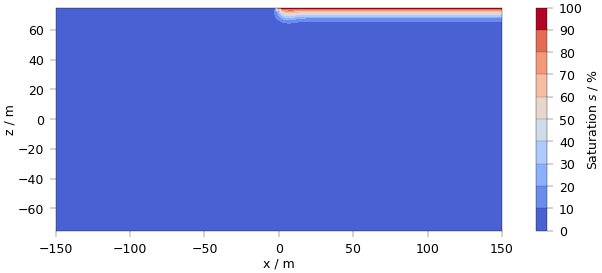

In [7]:
fig_t0_si = ot.plot.contourf(mesh_t0, ot.variables.saturation, vmin=0)
plt.show()

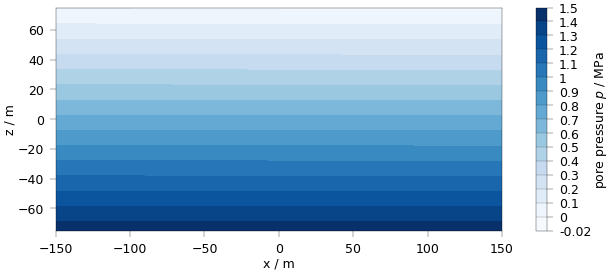

In [8]:
fig_t0_p = ot.plot.contourf(mesh_t0, ot.variables.pressure)
plt.show()

The concentration and pressure at the end of the simulation are shown in the figures below.

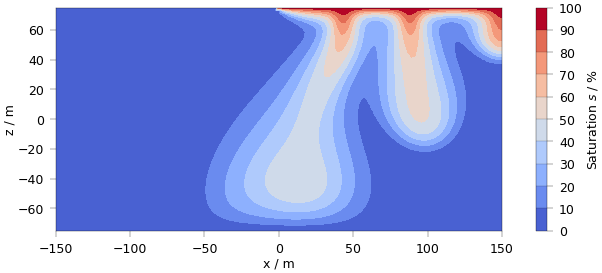

In [9]:
fig_tend_si = ot.plot.contourf(mesh_tend, ot.variables.saturation, vmin=0)
plt.show()

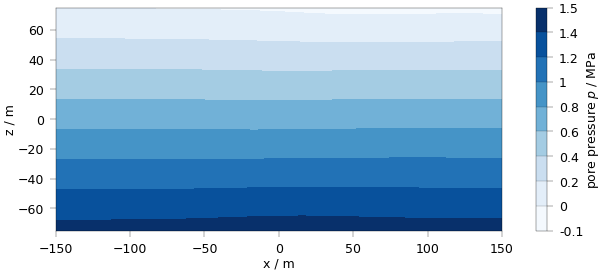

In [10]:
fig_tend_p = ot.plot.contourf(mesh_tend, ot.variables.pressure)
plt.show()

### Animate results

Down below the results are shown in an animated plot

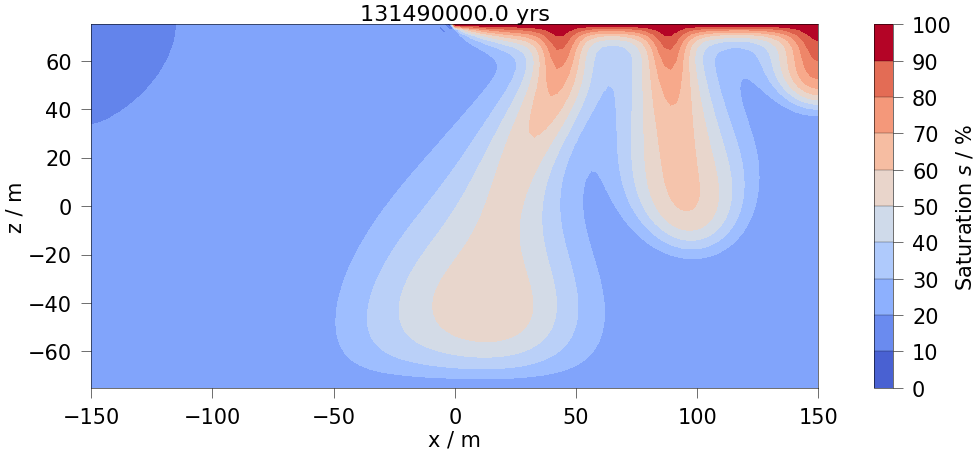

In [11]:
ms_2D = mesh_series.transform(lambda mesh: mesh.slice("y", [0, 0, 0]))
fig = ot.plot.contourf(ms_2D[0], ot.variables.saturation, vmin=0, vmax=100, dpi=50)
fig.axes[0].set_title(f"{0} yrs", fontsize=32)


def plot_contourf(timevalue: float, mesh: ot.Mesh) -> None:
    fig.axes[0].clear()
    ot.plot.contourf(mesh, ot.variables.saturation, ax=fig.axes[0], dpi=50)
    fig.axes[0].set_title(f"{timevalue:.1f} yrs", fontsize=32)


anim = ot.plot.animate(fig, plot_contourf, ms_2D.timevalues, ms_2D)
HTML(anim.to_jshtml())

## Literature

<!-- vale off -->

Diersch, H.-J.G., Kolditz, O., 1998. Coupled groundwater flow and transport: 2. Thermohaline and 3D convection systems. Adv. Water Resour. 21, 401–425. doi:10.1016/S0309-1708(97)00003-1.

Elder, J.W., 1965. Numerical experiments with free convection in a vertical slot. J. Fluid Mech. 24, 823. doi:10.1017/S0022112066001022.

Elder, J., Simmons, C., Diersch, H.-J., Frolkovič, P., Holzbecher, E., Johannsen, K., 2017. The Elder Problem. Fluids 2, 11. doi:10.3390/fluids2010011.

Graf, T., Degener, L., 2011. Grid convergence of variable-density flow simulations in discretely-fractured porous media. Adv. Water Resour. 34, 760–769. doi:10.1016/j.advwatres.2011.04.002.

Guo, W., Langevin, C.D., 2002. User`s Guide to SEAWAT: A computer program for simulation of three-dimensional variable-density ground-water flow, USGS Techniques of Water Resources Investigations. ISBN: 0607992573.

Johannsen, K., 2003. On the Validity of the Boussinesq Approximation for the Elder Problem. Comput. Geosci. 7, 169–182. doi:10.1023/A:1025515229807.

Kolditz, O., Görke, U.-J., Shao, H., Wang, W., 2012. Thermo-Hydro-Mechanical-Chemical Processes in Porous Media: Benchmarks and Examples, Lecture notes in computational science and engineering. Springer. ISBN: 3642271766.

Musuuza, J.L., Attinger, S., Radu, F.A., 2009. An extended stability criterion for density-driven flows in homogeneous porous media. Adv. Water Resour. 32, 796–808. doi:10.1016/j.advwatres.2009.01.012.

H.-J.G. Diersch, O. Kolditz, 2002,Variable-density flow and transport in porous media: approaches and challenges,Advances in Water Resources.25, 899-944,do:10.1016/S0309-1708(02)00063-5.

Elder, John W., Craig T. Simmons, Hans-Jörg Diersch, Peter Frolkovič, Ekkehard Holzbecher, and Klaus Johannsen. 2017. "The Elder Problem" Fluids 2, no. 1: 11. https://doi.org/10.3390/fluids2010011

<!--vale on -->